In [52]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [55]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [56]:
df = pd.read_excel('Gold_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

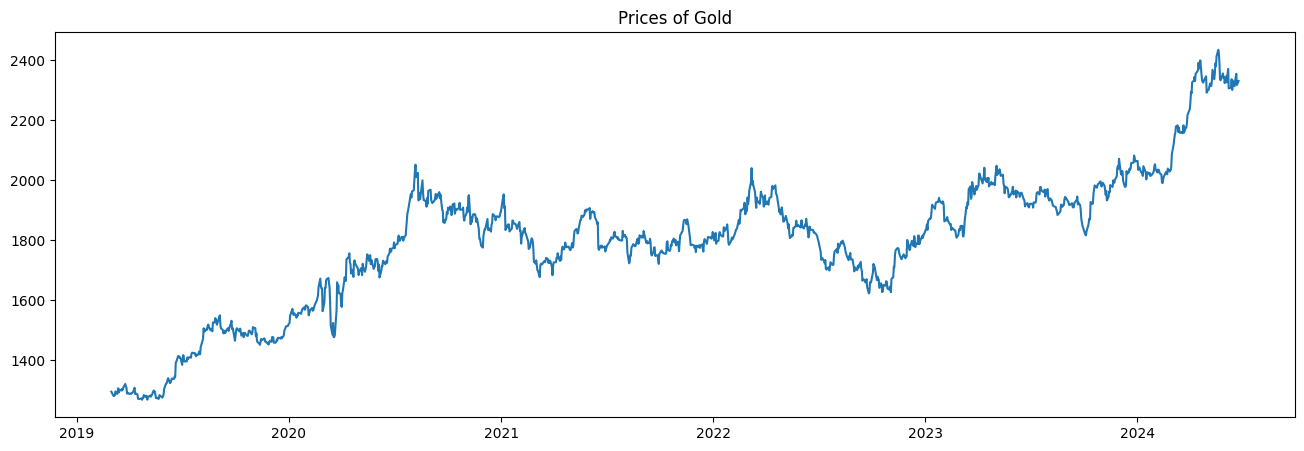

In [ ]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Gold')
    plt.show()

In [12]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,1312.199951,1312.199951,1288.900024,1296.400024,110
2019-03-04,2019-03-04,1285.500000,1287.000000,1281.900024,1284.800049,28
2019-03-05,2019-03-05,1287.000000,1287.000000,1282.000000,1282.000000,114
2019-03-06,2019-03-06,1287.099976,1287.099976,1282.599976,1284.900024,14
2019-03-07,2019-03-07,1281.000000,1284.599976,1281.000000,1283.800049,11
...,...,...,...,...,...,...
2024-06-17,2024-06-17,2320.199951,2320.199951,2309.600098,2312.399902,110
2024-06-18,2024-06-18,2311.800049,2330.399902,2311.800049,2330.399902,43
2024-06-20,2024-06-20,2328.899902,2354.000000,2328.300049,2353.800049,183
2024-06-21,2024-06-21,2331.199951,2331.199951,2316.399902,2316.399902,76


In [66]:
# Split dataset 

In [58]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [59]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [60]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [61]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.13229, saving model to save_model_7_2_1.keras
17/17 - 3s - 181ms/step - loss: 0.1323
Epoch 2/80

Epoch 2: loss improved from 0.13229 to 0.04213, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0421
Epoch 3/80

Epoch 3: loss improved from 0.04213 to 0.03177, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0318
Epoch 4/80

Epoch 4: loss did not improve from 0.03177
17/17 - 1s - 45ms/step - loss: 0.0324
Epoch 5/80

Epoch 5: loss did not improve from 0.03177
17/17 - 1s - 44ms/step - loss: 0.0338
Epoch 6/80

Epoch 6: loss improved from 0.03177 to 0.02988, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0299
Epoch 7/80

Epoch 7: loss did not improve from 0.02988
17/17 - 1s - 44ms/step - loss: 0.0303
Epoch 8/80

Epoch 8: loss improved from 0.02988 to 0.02947, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0295
Epoch 9/80

Epoch 9: loss did not improve from 0.0

In [62]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (837, 1)
Predicted y_train shape: (837, 1)


In [63]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [64]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [65]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [66]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8873311281204224], [0.8477267622947693], [0.8118695616722107], [0.7825086712837219], [0.7573950290679932], [0.7342408299446106], [0.7117963433265686], [0.6898884773254395], [0.6690093278884888], [0.6498440504074097], [0.6329494118690491], [0.6186233758926392], [0.6069107055664062], [0.5976707935333252], [0.5906562209129333], [0.5855745077133179], [0.5821254849433899], [0.5800198912620544], [0.5789845585823059], [0.5787623524665833], [0.5791114568710327], [0.5798071026802063], [0.5806429982185364], [0.5814355611801147], [0.5820283889770508], [0.5822948217391968], [0.5821408033370972], [0.5815048813819885], [0.5803573131561279], [0.5786972641944885]]


In [67]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [68]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2302.68575066]
 [2256.56251202]
 [2214.80322143]
 [2180.60953278]
 [2151.36218873]
 [2124.39681183]
 [2098.257966  ]
 [2072.74406846]
 [2048.42821409]
 [2026.10833474]
 [2006.43284117]
 [1989.74874177]
 [1976.10816763]
 [1965.34736743]
 [1957.17819718]
 [1951.26003473]
 [1947.24330332]
 [1944.79112923]
 [1943.58538094]
 [1943.32659973]
 [1943.73316667]
 [1944.54331568]
 [1945.5167995 ]
 [1946.43981821]
 [1947.13022537]
 [1947.44051293]
 [1947.26114312]
 [1946.5205485 ]
 [1945.18409072]
 [1943.25079794]]


In [69]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

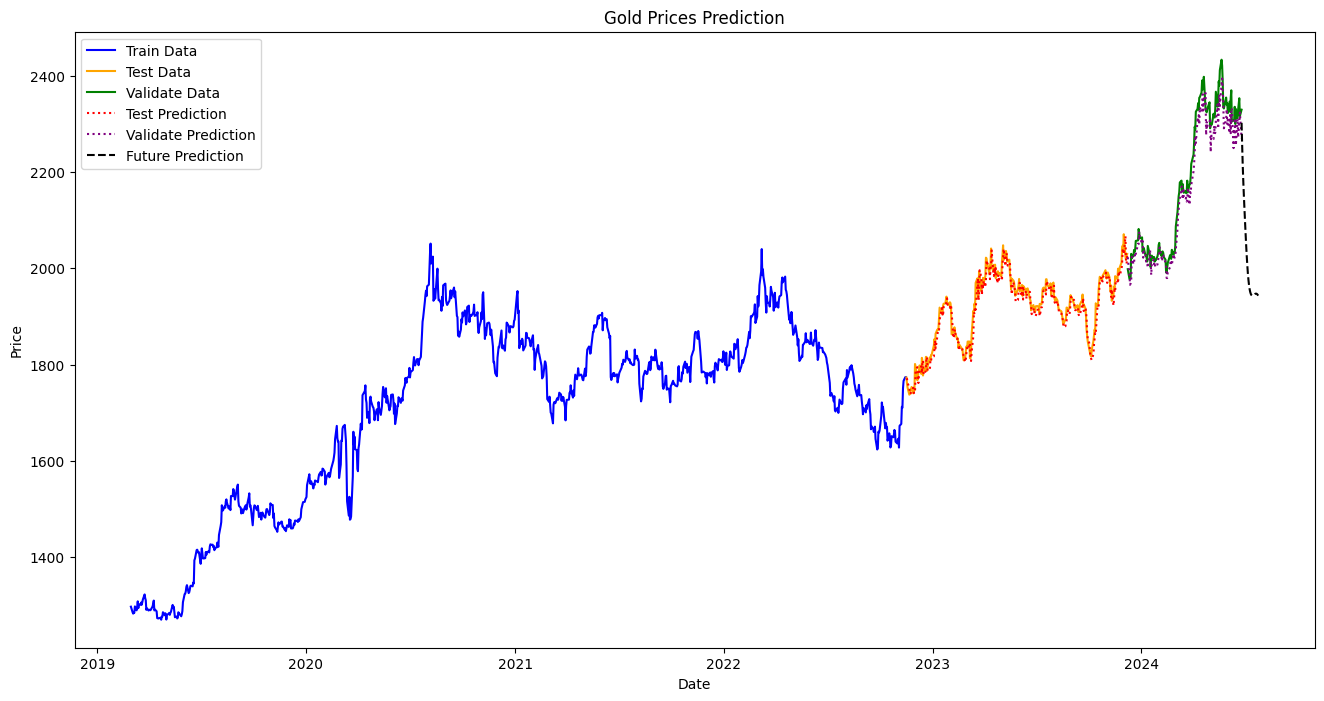

In [70]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [73]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.38870387845266
MAPE:  0.6958946599779383
RMSE:  17.791033778911988

** Validate **
MAE:  26.032516818576376
MAPE:  1.1637233322565717
RMSE:  32.34652906781124


In [30]:
# Split dataset 6-3-1

In [74]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [75]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [76]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [77]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.15140, saving model to save_model_6_3_1.keras
15/15 - 3s - 186ms/step - loss: 0.1514
Epoch 2/80

Epoch 2: loss improved from 0.15140 to 0.04381, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0438
Epoch 3/80

Epoch 3: loss improved from 0.04381 to 0.03825, saving model to save_model_6_3_1.keras
15/15 - 1s - 46ms/step - loss: 0.0383
Epoch 4/80

Epoch 4: loss improved from 0.03825 to 0.03284, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0328
Epoch 5/80

Epoch 5: loss improved from 0.03284 to 0.03134, saving model to save_model_6_3_1.keras
15/15 - 1s - 44ms/step - loss: 0.0313
Epoch 6/80

Epoch 6: loss improved from 0.03134 to 0.03067, saving model to save_model_6_3_1.keras
15/15 - 1s - 45ms/step - loss: 0.0307
Epoch 7/80

Epoch 7: loss did not improve from 0.03067
15/15 - 1s - 44ms/step - loss: 0.0308
Epoch 8/80

Epoch 8: loss improved from 0.03067 to 0.02888, saving model to save_model_6_3_1.keras


In [74]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [78]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [79]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [80]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [81]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8548669815063477], [0.8154215216636658], [0.7767269015312195], [0.7475637197494507], [0.7256990671157837], [0.7070696353912354], [0.6886045932769775], [0.6691822409629822], [0.6493054032325745], [0.6302602291107178], [0.6133168339729309], [0.5992524027824402], [0.5882423520088196], [0.5800014734268188], [0.5740148425102234], [0.5697376728057861], [0.5667145848274231], [0.5646215081214905], [0.5632497072219849], [0.5624645352363586], [0.5621597766876221], [0.5622255802154541], [0.5625321269035339], [0.5629338622093201], [0.5632811784744263], [0.563437819480896], [0.5632947087287903], [0.5627781748771667], [0.5618496537208557], [0.5605024695396423]]


In [82]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [83]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2264.87801027]
 [2218.93983351]
 [2173.87608457]
 [2139.91264734]
 [2114.44907609]
 [2092.75324263]
 [2071.24885729]
 [2048.62958863]
 [2025.48102632]
 [2003.30101933]
 [1983.56874383]
 [1967.18930933]
 [1954.36700581]
 [1944.76967982]
 [1937.79765033]
 [1932.81645912]
 [1929.2957713 ]
 [1926.85817448]
 [1925.26057535]
 [1924.34616417]
 [1923.99124241]
 [1924.06787719]
 [1924.42488142]
 [1924.8927423 ]
 [1925.29722677]
 [1925.47965086]
 [1925.3129841 ]
 [1924.71142885]
 [1923.63007325]
 [1922.06114275]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

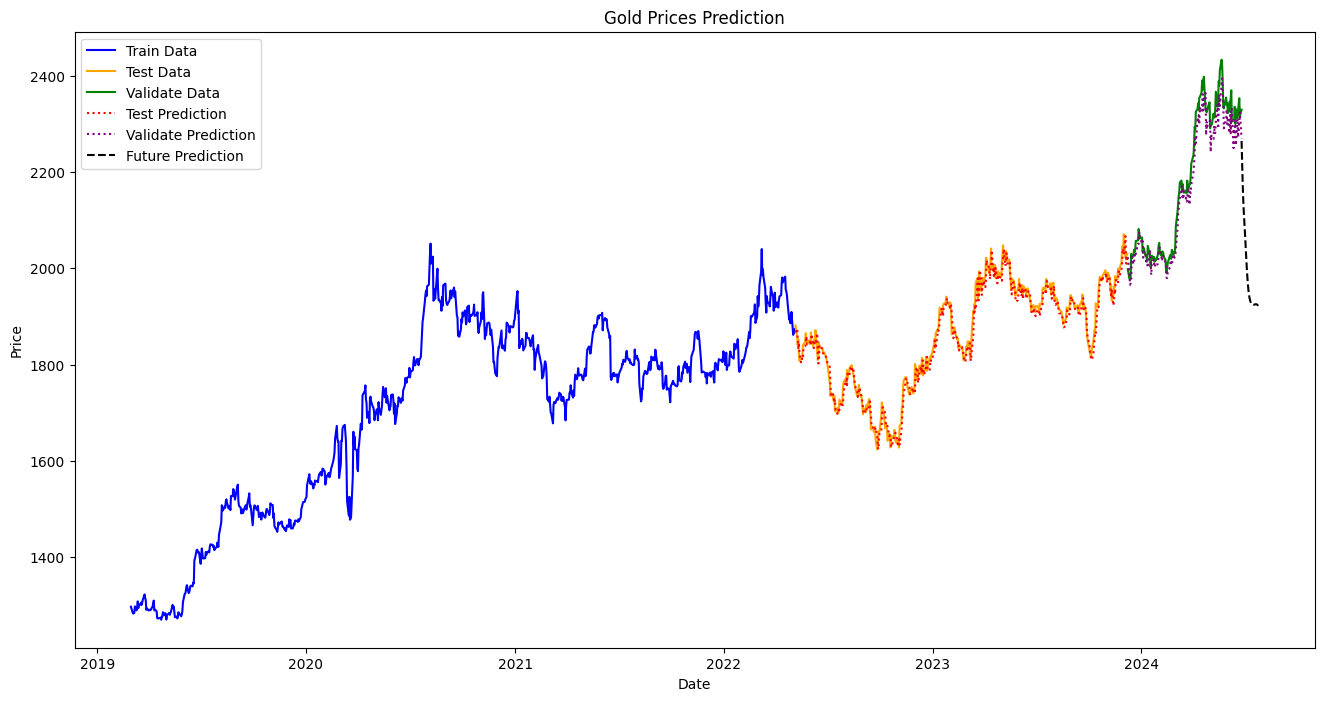

In [85]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [86]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.090830053771793
MAPE:  0.7031355915787191
RMSE:  17.28229836600664

** Validate **
MAE:  26.032516818576376
MAPE:  1.1637233322565717
RMSE:  32.34652906781124


In [44]:
# Split dataset 5-3-2 

In [87]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [88]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [89]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [90]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.12653, saving model to save_model_5_3_2.keras
12/12 - 3s - 246ms/step - loss: 0.1265
Epoch 2/80

Epoch 2: loss improved from 0.12653 to 0.05069, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0507
Epoch 3/80

Epoch 3: loss improved from 0.05069 to 0.03945, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0394
Epoch 4/80

Epoch 4: loss improved from 0.03945 to 0.03333, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0333
Epoch 5/80

Epoch 5: loss improved from 0.03333 to 0.02896, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0290
Epoch 6/80

Epoch 6: loss improved from 0.02896 to 0.02886, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0289
Epoch 7/80

Epoch 7: loss improved from 0.02886 to 0.02859, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0286
Epoch 8/80

Epoch 8: loss did not improve from 0.02859


In [91]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [92]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [93]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [94]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6689850176124654, 0.6729349559903242, 0.6584235129714655, 0.6494933861277543, 0.6570496714918301, 0.6576506943837377, 0.6550747023029009, 0.6474326763169937, 0.6430534059256623, 0.6213292689343695, 0.6190967634277884, 0.6292289360553147, 0.6373003988720811, 0.6510390233032108, 0.6465740122900481, 0.6443414019660807, 0.6605701730388296, 0.6518976873301565, 0.6566203394783574, 0.6557616754514117, 0.6666666666666667, 0.7020435826498714, 0.728490476606751, 0.7420574101594462, 0.7564830077390869, 0.7630946788196136, 0.7807832416286022, 0.7841319474797812, 0.7651553886303744, 0.7780353490345584, 0.7673879989543417, 0.7624936559277062, 0.7654130297654125, 0.7616349919007606, 0.7630087285630103, 0.7840459972231777, 0.7631806290762171, 0.7775202763992544, 0.7782072495477654, 0.7910872099519497, 0.8140992381662744, 0.8304998049348444, 0.8515370735950121, 0.8802163682410866, 0.8754079754710546, 0.907092594211439, 0.9122445783731126, 0.9223768558180254, 0.9104415096973899, 0.9320798012

In [95]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8448165655136108], [0.8178011178970337], [0.7861196994781494], [0.7543715834617615], [0.7240588665008545], [0.6960368752479553], [0.6708003282546997], [0.6485635638237], [0.6293259263038635], [0.6129322648048401], [0.5991276502609253], [0.5876030325889587], [0.5780298113822937], [0.570083498954773], [0.5634601712226868], [0.5578857064247131], [0.5531203746795654], [0.5489606261253357], [0.5452381372451782], [0.5418186783790588], [0.538598358631134], [0.5355002284049988], [0.5324709415435791], [0.5294762849807739], [0.5264976024627686], [0.5235278010368347], [0.5205691456794739], [0.5176286101341248], [0.5147173404693604], [0.5118472576141357]]


In [96]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [97]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2253.17329727]
 [2221.71111094]
 [2184.81493569]
 [2147.84108442]
 [2112.53889869]
 [2079.90449178]
 [2050.51401285]
 [2024.61708025]
 [2002.21293042]
 [1983.12087463]
 [1967.04402256]
 [1953.62245451]
 [1942.47348249]
 [1933.2192082 ]
 [1925.5056817 ]
 [1919.01366081]
 [1913.46395616]
 [1908.6195136 ]
 [1904.28430359]
 [1900.3020023 ]
 [1896.55161839]
 [1892.94353639]
 [1889.41562935]
 [1885.92805276]
 [1882.45907953]
 [1879.00044923]
 [1875.55479963]
 [1872.13025237]
 [1868.73978814]
 [1865.39729007]]


In [ ]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

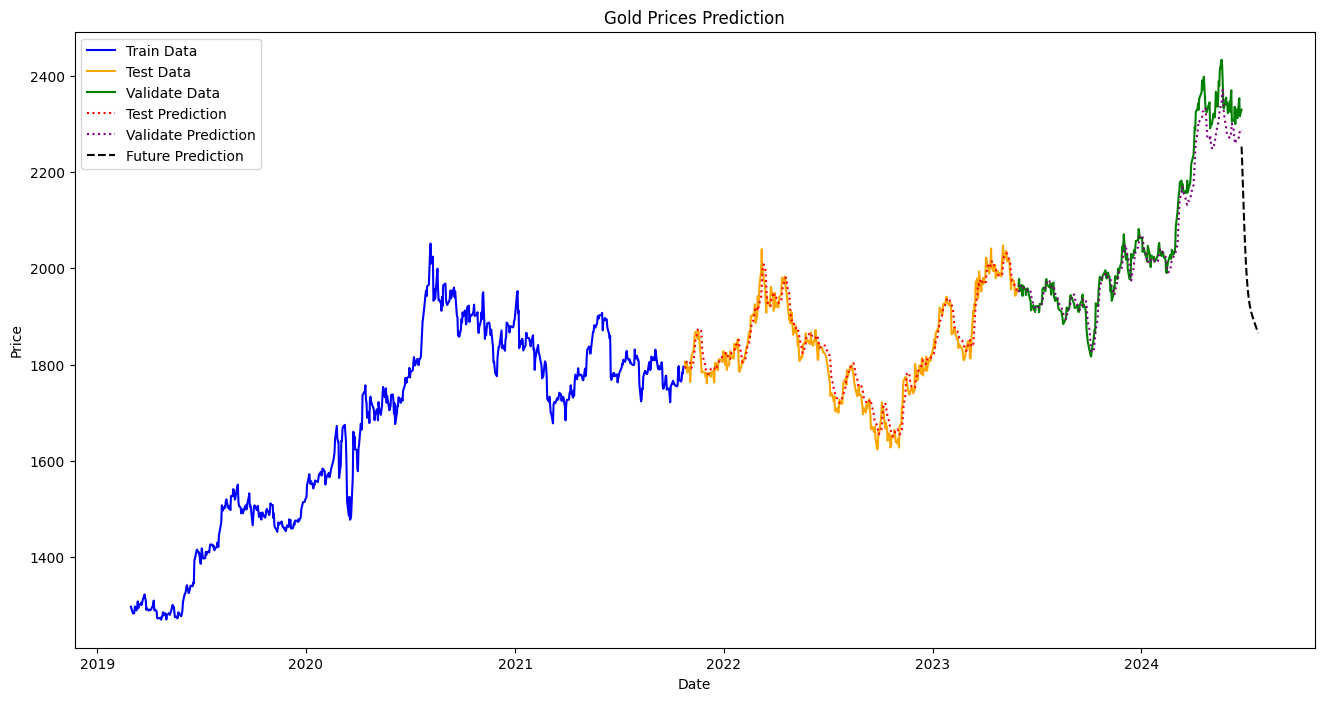

In [99]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

In [100]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  18.56063241554318
MAPE:  1.0216545283235297
RMSE:  23.98149849815225

** Validate **
MAE:  23.623751615503036
MAPE:  1.0993206220452771
RMSE:  32.155502426491445


In [101]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [12.5019, 13.0908, 18.5606],
    "Testing MAPE": [0.6512, 0.7031, 1.0217],
    "Testing RMSE": [16.8448, 17.2823, 23.9815],
    "Validation MAE": [21.3910, 26.0325, 23.6238],
    "Validation MAPE": [0.9552, 1.1637, 1.0993],
    "Validation RMSE": [28.0878, 32.3465, 32.1555],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))

Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      12.5019        0.6512       16.8448         21.3910           0.9552          28.0878
 LSTM 6-3-1      13.0908        0.7031       17.2823         26.0325           1.1637          32.3465
 LSTM 5-3-2      18.5606        1.0217       23.9815         23.6238           1.0993          32.1555
